In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1, analyze_expt2

#### Load human behav data

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all1, subjects1, subject_cb1, cue_level_names, image_type_names = analyze_expt1.load_data()
trial_data_all2, subjects2, subject_cb2, cue_level_names, image_type_names = analyze_expt2.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition1, dprime_by_condition1, propyes_by_condition1, rt_by_condition1 = analyze_expt1.get_perf_by_cond()
acc_by_condition2, dprime_by_condition2, propyes_by_condition2, rt_by_condition2 = analyze_expt2.get_perf_by_cond()


#### Load image discriminability 

In [3]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1.npy')
d = np.load(fn2load, allow_pickle=True).item()
d.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [4]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt2.npy')
d_gray = np.load(fn2load, allow_pickle=True).item()
d_gray.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [5]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_shuffle.npy')
d_shuff = np.load(fn2load, allow_pickle=True).item()
d_shuff.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [6]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_subsample_super.npy')
d_sub = np.load(fn2load, allow_pickle=True).item()
d_sub.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [7]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_subsample_super_method2.npy')
d_sub2 = np.load(fn2load, allow_pickle=True).item()
d_sub2.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [8]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_shuffle_subsample_super.npy')
d_shuff_sub = np.load(fn2load, allow_pickle=True).item()
d_shuff_sub.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [9]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_shuffle_subsample_super_method2.npy')
d_shuff_sub2 = np.load(fn2load, allow_pickle=True).item()
d_shuff_sub2.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [10]:
project_root = '/user_data/mmhender/featsynth/'
image_set_name = 'images_expt1'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

In [11]:
# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])
basic_inds = np.array(labels['basic_index'][0::n_ims_each])
super_inds_long = np.array(labels['super_index'][0::n_ims_each])
n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_cbinds = np.repeat(np.array([0,1]), n_basic_each_super)
super_inds = np.arange(n_super)

# more image properties to organize images
image_type_names = ['pool1','pool2','pool3','pool4','orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

In [27]:
n_basic_each_super

10

In [45]:
np.unique(labels['exemplar_number'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
imtype='pool1'
cbi=0;
inds = (labels['image_type']==imtype) & \
                    np.isin(np.array(labels['super_index']), super_inds[super_cbinds==cbi])  & \
        (np.mod(labels['basic_index'],10)==1)
        # (labels['exemplar_number']==1)

labs_use = np.array(labels['super_index'])[inds]
labels[inds]

,Unnamed: 0,super_name,super_index,basic_name,basic_index,image_type,exemplar_number,image_filename
50,50,bird,0,duck,1,pool1,1,/user_data/mmhender/stimuli/featsynth/images_v...
55,55,bird,0,duck,1,pool1,2,/user_data/mmhender/stimuli/featsynth/images_v...
60,60,bird,0,duck,1,pool1,3,/user_data/mmhender/stimuli/featsynth/images_v...
65,65,bird,0,duck,1,pool1,4,/user_data/mmhender/stimuli/featsynth/images_v...
70,70,bird,0,duck,1,pool1,5,/user_data/mmhender/stimuli/featsynth/images_v...
...,...,...,...,...,...,...,...,...
4575,4575,weapon,9,brass_knuckles,91,pool1,6,/user_data/mmhender/stimuli/featsynth/images_v...
4580,4580,weapon,9,brass_knuckles,91,pool1,7,/user_data/mmhender/stimuli/featsynth/images_v...
4585,4585,weapon,9,brass_knuckles,91,pool1,8,/user_data/mmhender/stimuli/featsynth/images_v...
4590,4590,weapon,9,brass_knuckles,91,pool1,9,/user_data/mmhender/stimuli/featsynth/images_v...


In [26]:
np.unique(labels['basic_name'][inds])

array(['boxing_gloves', 'brace', 'brass_knuckles', 'buggy', 'cellphone',
       'centerpiece', 'coconut', 'duck', 'ear', 'espresso'], dtype=object)

In [12]:
10000/5/2

1000.0

In [18]:
si =0; supname = super_names[si]
inds = (labels['image_type']==imtype) & (labels['super_name']==supname)
np.sum(inds)

100

In [19]:
labels[inds]

,Unnamed: 0,super_name,super_index,basic_name,basic_index,image_type,exemplar_number,image_filename
0,0,bird,0,chick,0,pool1,1,/user_data/mmhender/stimuli/featsynth/images_v...
5,5,bird,0,chick,0,pool1,2,/user_data/mmhender/stimuli/featsynth/images_v...
10,10,bird,0,chick,0,pool1,3,/user_data/mmhender/stimuli/featsynth/images_v...
15,15,bird,0,chick,0,pool1,4,/user_data/mmhender/stimuli/featsynth/images_v...
20,20,bird,0,chick,0,pool1,5,/user_data/mmhender/stimuli/featsynth/images_v...
...,...,...,...,...,...,...,...,...
475,475,bird,0,vulture,9,pool1,6,/user_data/mmhender/stimuli/featsynth/images_v...
480,480,bird,0,vulture,9,pool1,7,/user_data/mmhender/stimuli/featsynth/images_v...
485,485,bird,0,vulture,9,pool1,8,/user_data/mmhender/stimuli/featsynth/images_v...
490,490,bird,0,vulture,9,pool1,9,/user_data/mmhender/stimuli/featsynth/images_v...


In [11]:
10000/5/20

100.0

In [8]:
labels.shape

(10000, 8)

In [7]:
np.sum(inds)

1000

#### Params for plotting

In [14]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

#### Comparing human perf versus SimCLR discriminability
simclr in gray on these plots

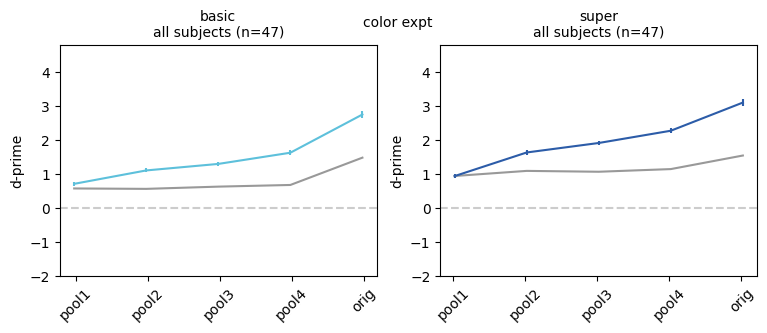

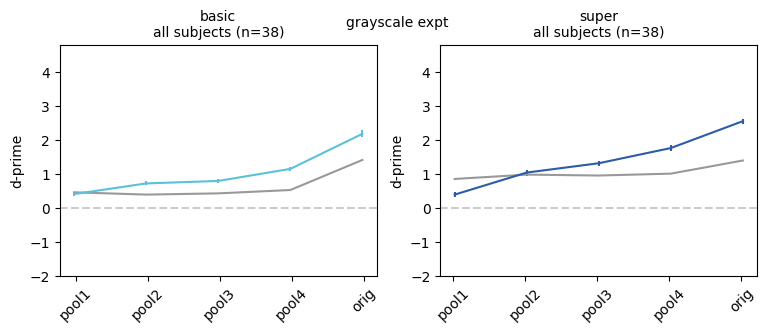

In [15]:
plot_utils.set_all_font_sizes(10)

for ee, [ename, dvals_human, dvals_model] in enumerate(zip(['color expt', 'grayscale expt'], \
                                    [dprime_by_condition1, dprime_by_condition2], \
                                    [d, d_gray])):

    plt.figure(figsize=(9,3))

    for cc, cue in enumerate(cue_level_names):

        ax = plt.subplot(1,2,cc+1)

        lh = []

        vals = dvals_human[:,cc,:]
        n_subs_plot = vals.shape[0]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                         meanvals, \
                         semvals, \
                        color = cue_level_colors[cc,:])
        
        if cc==0:
            vals = np.mean(dvals_model['dprime_basic_overall'], axis=1)
        else:
            vals = np.mean(dvals_model['dprime_super_overall'], axis=1)

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                 '-',color=[0.6, 0.6, 0.6])


        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        # ax.legend(lh, np.repeat(cue_level_names,2), loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])

        plt.title('%s\nall subjects (n=%d)'%(cue,n_subs_plot))
        
    plt.suptitle(ename)

#### Plot overall "performance" of SimCLR for each condition

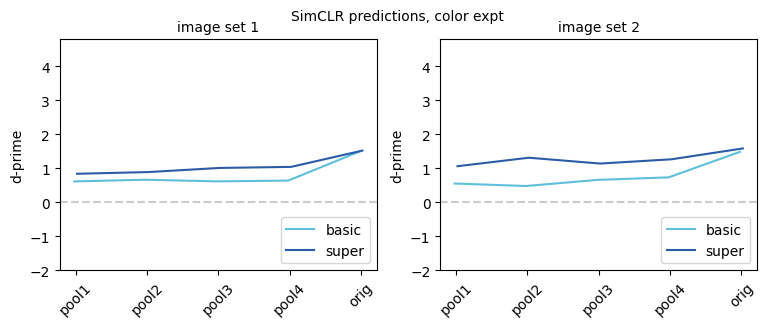

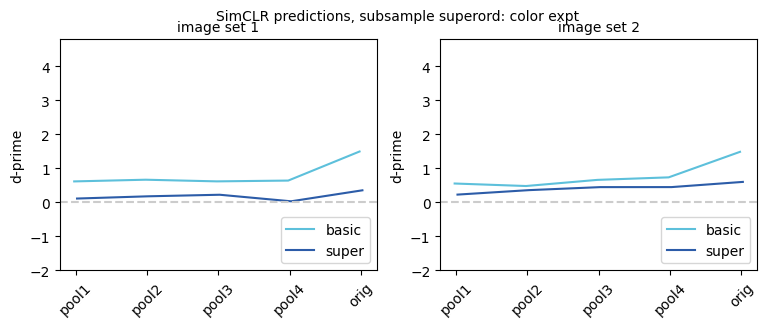

In [17]:
plot_utils.set_all_font_sizes(10)
    
for ee, [ename, dvals_model] in enumerate(zip(['color expt', \
                                               # 'grayscale expt', 'SHUFFLE: color expt', \
                                              #  'subsample super: color expt', \
                                              # 'SHUFFLE subsample super: color expt', \
                                              'subsample superord: color expt', \
                                              # 'SHUFFLE subsample super method2: color expt', \
                                              ], \
                                    [d, \
                                     # d_gray, \
                                     # d_shuff, d_sub, \
                                     # d_shuff_sub, \
                                    d_sub2, \
                                     # d_shuff_sub2, \
                                    ])):

    
    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        ax = plt.subplot(1,2,cb)

        # lh = []

        vals1 = np.mean(dvals_model['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
        vals2 = dvals_model['dprime_super_overall'][:,cbi]

        # print(dvals_model['dprime_basic_overall'].shape)
        # 
        if len(vals2.shape)>1:
            vals2 = np.mean(vals2, axis=1)
            # print(dvals_model['dprime_super_overall'].shape)
    
        for cc, vals in enumerate([vals1, vals2]):

            h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                     '-',color=cue_level_colors[cc,:])

            # lh.append(h[0])

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
        ax.legend(cue_level_names, loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])

        plt.title('image set %d'%(cb))

    plt.suptitle('SimCLR predictions, %s'%ename);

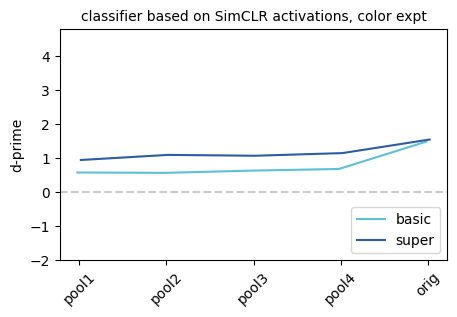

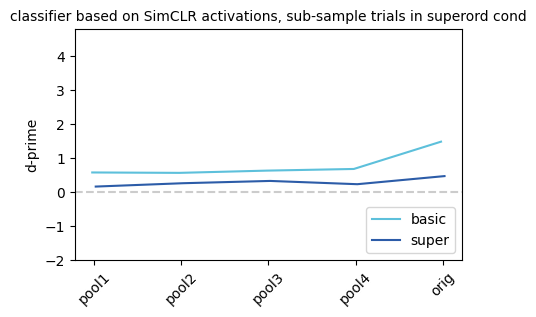

In [20]:
plot_utils.set_all_font_sizes(10)
    
for ee, [ename, dvals_model] in enumerate(zip(['color expt', \
                                               # 'grayscale expt', 'SHUFFLE: color expt', \
                                              #  'subsample super: color expt', \
                                              # 'SHUFFLE subsample super: color expt', \
                                              'sub-sample trials in superord cond', \
                                              # 'SHUFFLE subsample super method2: color expt', \
                                              ], \
                                    [d, \
                                     # d_gray, \
                                     # d_shuff, d_sub, \
                                     # d_shuff_sub, \
                                    d_sub2, \
                                     # d_shuff_sub2, \
                                    ])):

    
    plt.figure(figsize=(5,3))

    # for cbi, cb in enumerate([1,2]):

    ax = plt.subplot(1,1,1)

    # lh = []

    vals1 = np.mean(dvals_model['dprime_basic_overall'], axis=1)
    vals2 = np.mean(dvals_model['dprime_super_overall'], axis=1)

    # print(dvals_model['dprime_basic_overall'].shape)
    # 
    if len(vals2.shape)>1:
        vals2 = np.mean(vals2, axis=1)
        # print(dvals_model['dprime_super_overall'].shape)

    for cc, vals in enumerate([vals1, vals2]):

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                 '-',color=cue_level_colors[cc,:])

        # lh.append(h[0])

        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

    # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
    ax.legend(cue_level_names, loc='lower right')

    plt.ylabel('d-prime')

    plt.ylim([-2, 4.8])

    plt.title('classifier based on SimCLR activations, %s'%ename);

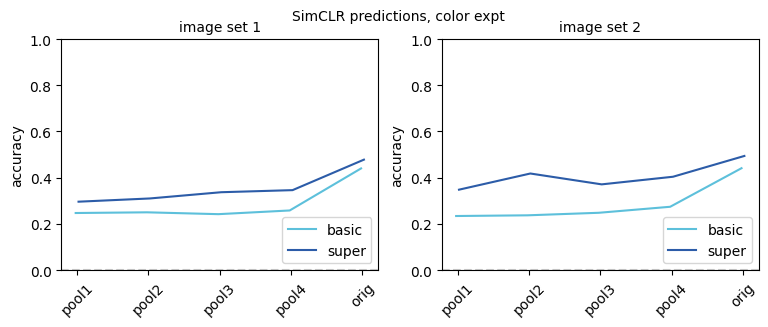

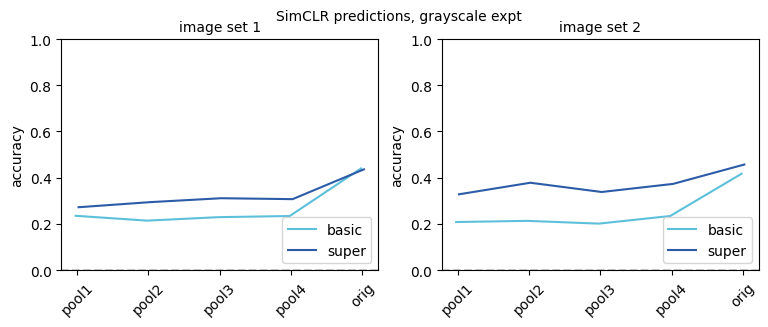

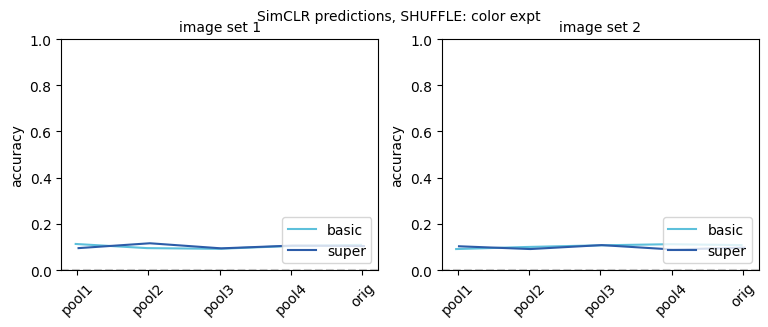

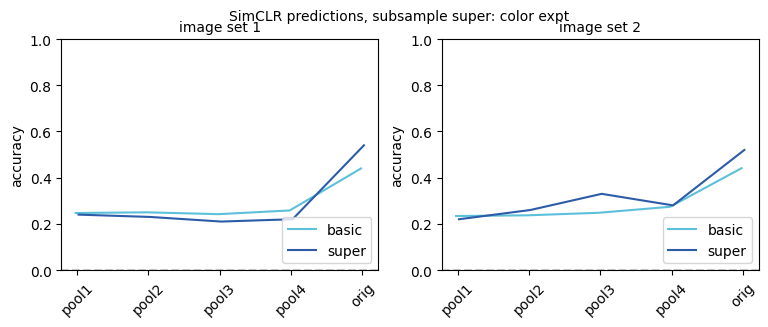

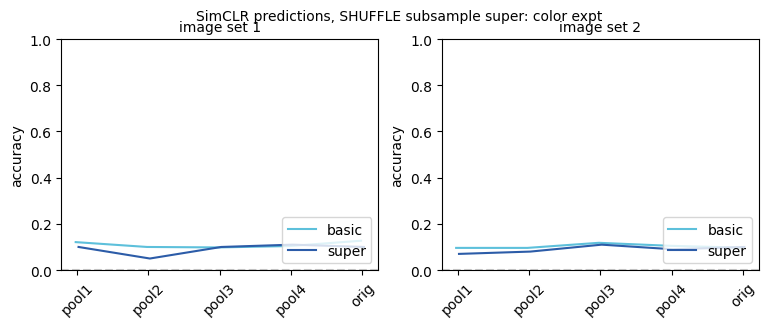

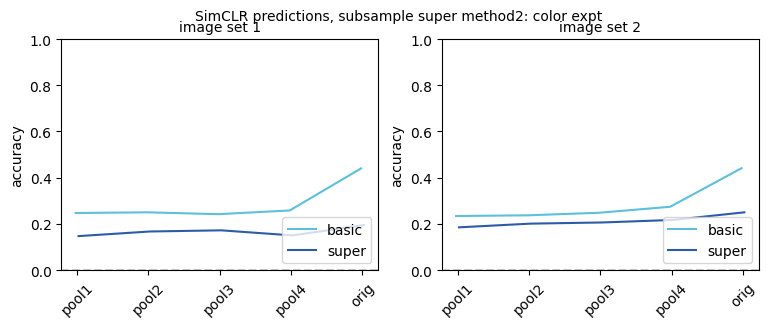

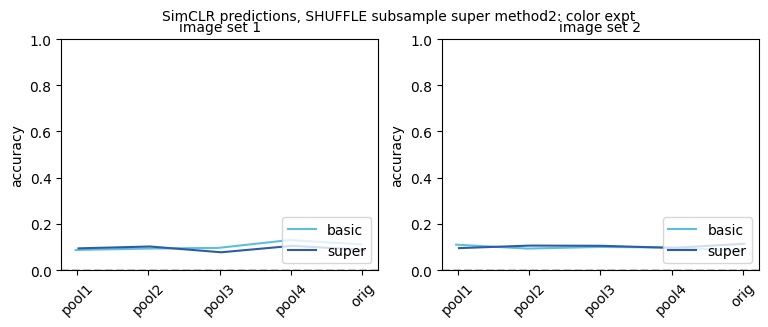

In [28]:
plot_utils.set_all_font_sizes(10)
    
for ee, [ename, dvals_model] in enumerate(zip(['color expt', 'grayscale expt', 'SHUFFLE: color expt', \
                                               'subsample super: color expt', \
                                              'SHUFFLE subsample super: color expt', \
                                              'subsample super method2: color expt', \
                                              'SHUFFLE subsample super method2: color expt'], \
                                    [d, d_gray, d_shuff, d_sub, d_shuff_sub, \
                                    d_sub2, d_shuff_sub2])):

    
    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        ax = plt.subplot(1,2,cb)

        # lh = []

        vals1 = np.mean(dvals_model['acc_basic_overall'][:,super_cbinds==cbi], axis=1)
        vals2 = dvals_model['acc_super_overall'][:,cbi]

        # print(dvals_model['dprime_basic_overall'].shape)
        # 
        if len(vals2.shape)>1:
            vals2 = np.mean(vals2, axis=1)
            # print(dvals_model['dprime_super_overall'].shape)
    
        for cc, vals in enumerate([vals1, vals2]):

            h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                     '-',color=cue_level_colors[cc,:])

            # lh.append(h[0])

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
        ax.legend(cue_level_names, loc='lower right')

        plt.ylabel('accuracy')

        plt.ylim([0, 1])

        plt.title('image set %d'%(cb))

    plt.suptitle('SimCLR predictions, %s'%ename);

In [24]:
vals2.shape

(5, 10)

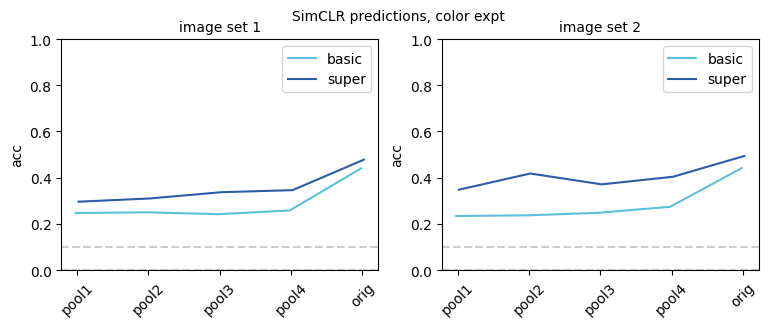

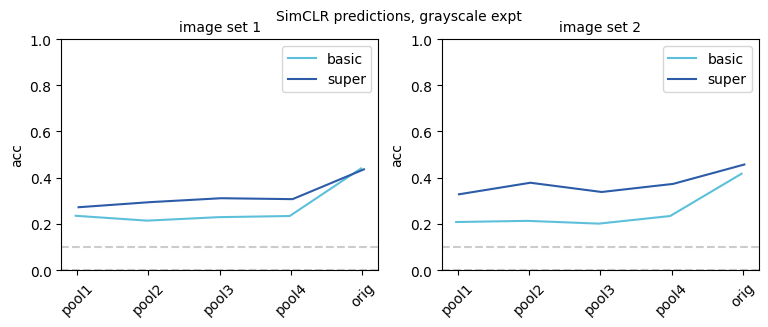

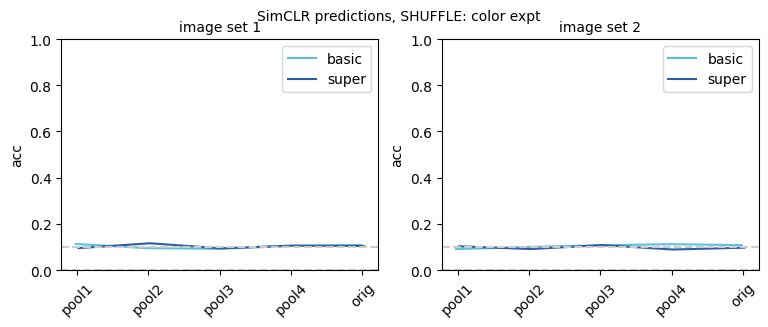

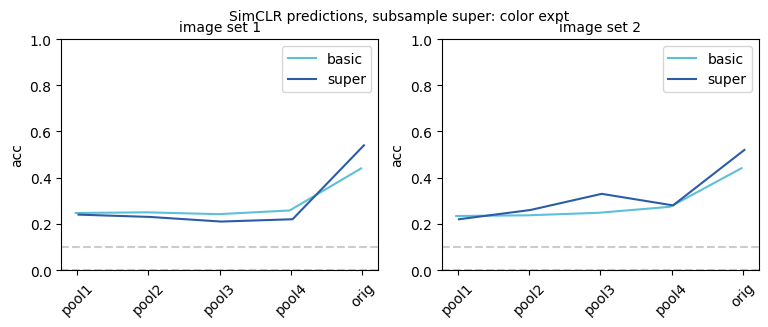

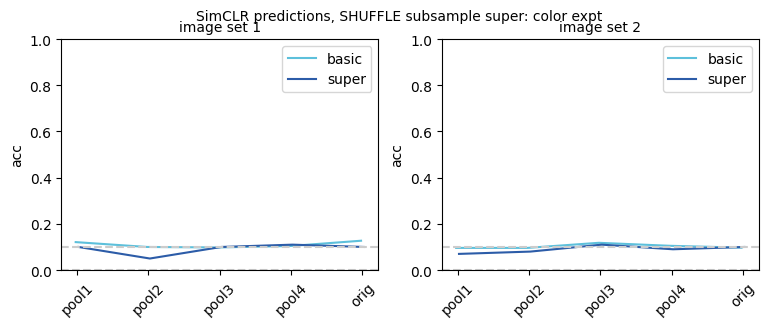

In [43]:
plot_utils.set_all_font_sizes(10)
    
for ee, [ename, dvals_model] in enumerate(zip(['color expt', 'grayscale expt', 'SHUFFLE: color expt'], \
                                    [d, d_gray, d_shuff])):

    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        ax = plt.subplot(1,2,cb)

        # lh = []

        vals1 = np.mean(dvals_model['acc_basic_overall'][:,super_cbinds==cbi], axis=1)
        vals2 = dvals_model['acc_super_overall'][:,cbi]

        for cc, vals in enumerate([vals1, vals2]):

            h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                     '-',color=cue_level_colors[cc,:])

            # lh.append(h[0])

            plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
        ax.legend(cue_level_names, loc='upper right')

        plt.ylabel('acc')

        plt.ylim([0, 1])
        
        plt.axhline(1/10, color=[0.8, 0.8, 0.8], linestyle='--')


        plt.title('image set %d'%(cb))

    plt.suptitle('SimCLR predictions, %s'%ename);

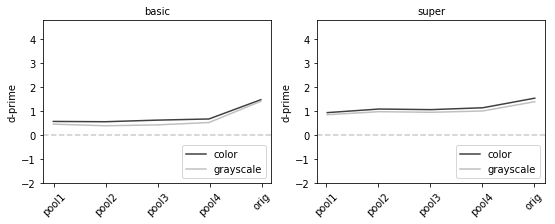

In [10]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(9,3))
    
for cc, cue in enumerate(cue_level_names):
    
    ax = plt.subplot(1,2,cc+1)

    lh = []
    
    for ee, [ename, dvals_model] in enumerate(zip(['color expt', 'grayscale expt'], \
                                    [d, d_gray])):


        if cc==0:
            vals = np.mean(dvals_model['dprime_basic_overall'], axis=1)
        else:
            vals = np.mean(dvals_model['dprime_super_overall'], axis=1)

        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], vals,None,\
                 color=color_cond_colors[ee,:])
        lh.append(h)

    plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)

    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, ['color','grayscale'], loc='lower right')

    plt.ylabel('d-prime')

    plt.ylim([-2, 4.8])

    plt.title('%s'%cue_level_names[cc])


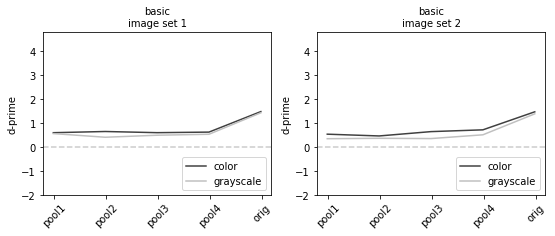

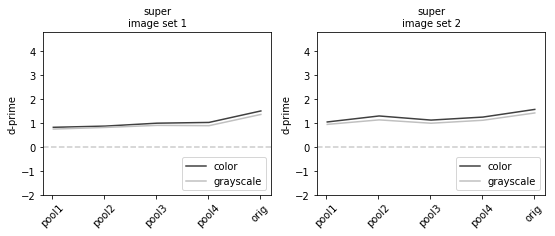

In [11]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]

plot_utils.set_all_font_sizes(10)

for cc, cue in enumerate(cue_level_names):
    
    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        
        ax = plt.subplot(1,2,cbi+1)

        lh = []

        if cc==0:
            vals = np.mean(d['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
        else:
            vals = d['dprime_super_overall'][:,cbi]
    
        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], vals,None,\
                 color=color_cond_colors[0,:])
        lh.append(h)

        if cc==0:
            vals = np.mean(d_gray['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
        else:
            vals = d_gray['dprime_super_overall'][:,cbi]
    
        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], vals,None,\
                 color=color_cond_colors[1,:])
        lh.append(h)


        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, ['color','grayscale'], loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])

        plt.title('%s\nimage set %d'%(cue, cb))


#### Compare natural or artificial categories

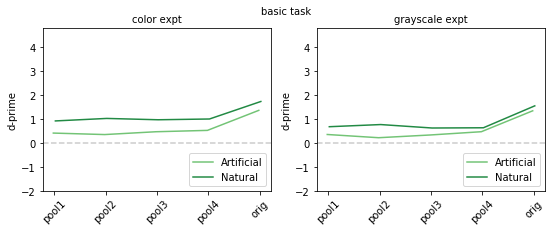

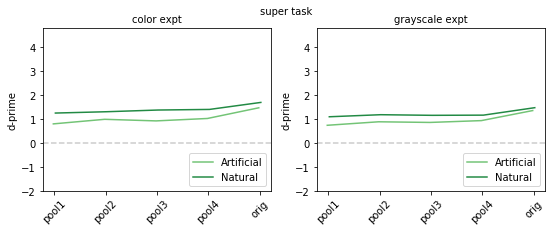

In [12]:
n_color_conds = 2;
color_cond_names = ['color expt', 'grayscale expt']

is_natural = np.array([1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1]).astype(bool)
kind_names = ['Artificial','Natural']
n_kinds = len(kind_names)
n_image_sets = 2

dprime_by_nat = np.zeros((n_color_conds, n_cue_levels, n_image_types, n_kinds))

for ee, [ename, dvals_model] in enumerate(zip(color_cond_names, \
                                    [d, d_gray])):

    for ii in range(n_image_types):
        for kk in range(n_kinds):

            super_inds_use = (is_natural==kk)

            # basic
            dprime_by_nat[ee, 0, ii, kk] = np.mean(dvals_model['dprime_basic_overall'][ii, super_inds_use])

            # super
            dprime_by_nat[ee, 1, ii, kk] = np.mean(dvals_model['dprime_each_supcat'][super_inds_use,ii])
            
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for ee in np.arange(n_color_conds):
    
        ax = plt.subplot(1,2,ee+1)
        
        vals = dprime_by_nat[ee,cc,:,:]
        
        plot_vals = vals;
       
        lh = []
        
        for kk in range(n_kinds):

            h = plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             vals[:,kk], \
                             # semvals[:,kk], \
                            color = nat_colors[kk,:])
            lh.append(h)
            
        plt.title('%s'%(color_cond_names[ee]))
        
        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])
        
    plt.suptitle('%s task'%(cue_level_names[cc]))